In [263]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
housing = housing.frame

<img src = "images/Screenshot 2024-10-02 at 3.15.02 PM.png" style="max-height: 300px; max-width: 300px;"/>

In [264]:
housing.head()
train, test = train_test_split(housing, test_size=0.2, random_state=1)
predictors = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
target = ["MedHouseVal"]
X =  train[predictors].copy()
y = train[target].copy()

In [265]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15961,3.1908,52.0,5.000000,1.014184,879.0,3.117021,37.71,-122.43
1771,3.6094,42.0,4.900990,0.957096,971.0,3.204620,37.95,-122.35
16414,2.6250,16.0,8.333333,1.666667,20.0,3.333333,37.90,-121.24
5056,1.5143,34.0,3.805981,1.149526,3538.0,2.580598,34.02,-118.35
8589,7.3356,38.0,5.894904,1.057325,750.0,2.388535,33.89,-118.39
...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


In [266]:
y

,MedHouseVal
15961,2.55600
1771,1.14600
16414,1.37500
5056,1.18800
8589,4.22700
...,...
10955,2.05300
17289,5.00001
5192,1.04800
12172,1.40700


In [267]:
x_mean = X.mean()
x_std = X.std()
X = (X-x_mean) / x_std
X["Intercept"] = 1
X = X[["Intercept"] + predictors]
X.describe()

,Intercept,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.0,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,1.0,-1.678244e-16,5.314440e-17,1.882646e-16,2.117169e-16,2.538882e-17,4.599034e-18,3.076781e-16,-1.819819e-15
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-1.784880e+00,-2.193260e+00,-1.758011e+00,-1.510852e+00,-1.265627e+00,-2.021979e-01,-1.446920e+00,-2.353937e+00
25%,1.0,-6.894220e-01,-8.425576e-01,-3.830576e-01,-1.840353e-01,-5.688572e-01,-5.757223e-02,-7.965017e-01,-1.113636e+00
50%,1.0,-1.753025e-01,3.142611e-02,-8.209978e-02,-1.001650e-01,-2.324855e-01,-2.427455e-02,-6.420859e-01,5.400979e-01
75%,1.0,4.619678e-01,6.670507e-01,2.359329e-01,-4.654872e-05,2.649531e-01,1.542271e-02,9.722610e-01,7.791920e-01
max,1.0,5.880761e+00,1.858847e+00,5.221203e+01,6.500156e+01,3.048413e+01,1.069410e+02,2.956270e+00,2.622209e+00


In [268]:
#Ridge Parameter
alpha = 2 
I = np.identity(X.shape[1])
penalty = alpha * I
I[0][0] = 0

In [269]:
#Coefficients Vector
B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
B

,MedHouseVal
0,2.077099
1,0.829510
2,0.122092
3,-0.273301
4,0.320152
5,-0.004072
6,-0.039995
7,-0.908741
8,-0.882944


In [270]:
B.index = ["Intercept","MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
B

,MedHouseVal
Intercept,2.077099
MedInc,0.829510
HouseAge,0.122092
AveRooms,-0.273301
AveBedrms,0.320152
Population,-0.004072
AveOccup,-0.039995
Latitude,-0.908741
Longitude,-0.882944


In [271]:
def ridge_fit(train , predictors, target , alpha):
    #Normalize test data
    X = train[predictors]
    y = train[target]
    xmean = X.mean()
    xstd = X.std()
    X = (X - xmean )/ xstd
    #Add interecept column and ensure it is in the correct palce
    X['intercept'] = 1 
    X = X[['intercept'] + predictors]
    penalty = alpha * np.identity(X.shape[1])
    penalty[0][0] = 0
    B= np.linalg.inv(X.T @ X + penalty) @X.T @ y
    return B,xmean,xstd

In [272]:
def ridge_predict(test , predictors,xmean,xstd,B):
    #Normalize test data
    X_test = test[predictors]
    X_test = (X_test - xmean) / xstd
    #Add interecept column and ensure it is in the correct palce 
    X_test['intercept'] = 1
    X_test= X_test[['intercept'] + predictors]
    predictions = X_test @ np.array(B)
    return predictions

In [273]:
test_X = test[predictors]
test_X = (test_X - x_mean) / x_std
test_X["Intercept"] = 1
test_X = test_X[["Intercept"] + predictors]
predictions_calc = test_X @ np.array(B)
predictions_calc

,0
4712,2.125268
2151,0.940369
15927,2.708087
82,1.712271
8161,2.826452
...,...
2319,0.973797
5341,1.749559
16888,2.944939
6823,2.638670


In [274]:
#Lets compare our calcuated B coefficients with sklearns Ridge module 
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = alpha)
ridge.fit(X[predictors],y)

Ridge(alpha=2)

In [275]:
ridge_coef = ridge.coef_
ridge_coef


array([[ 0.82951049,  0.12209213, -0.27330062,  0.32015195, -0.00407195,
        -0.03999487, -0.90874148, -0.88294383]])

In [276]:
ridge_intercept = ridge.intercept_
ridge_intercept

array([2.07735064])

In [277]:
#Put intercept and coef into a 9x1 row vector
sklearn_coef  = np.concatenate((ridge_intercept,ridge_coef.flatten())).reshape(9,1)
sklearn_coef

array([[ 2.07735064],
       [ 0.82951049],
       [ 0.12209213],
       [-0.27330062],
       [ 0.32015195],
       [-0.00407195],
       [-0.03999487],
       [-0.90874148],
       [-0.88294383]])

In [278]:
B_coef = np.array(B)
B_coef

array([[ 2.07709906],
       [ 0.82951049],
       [ 0.12209213],
       [-0.27330062],
       [ 0.32015195],
       [-0.00407195],
       [-0.03999487],
       [-0.90874148],
       [-0.88294383]])

In [279]:
calculated_coef = np.array(B)
coef_diff = sklearn_coef - B_coef
coef_diff
#As you can see, the difference is just a matter of precision error, effetively there is no difference between our coefficient values and sklearns prediciton

array([[ 2.51586610e-04],
       [ 0.00000000e+00],
       [-6.80011603e-16],
       [ 3.66373598e-15],
       [-2.49800181e-15],
       [-6.22765728e-16],
       [ 1.04083409e-16],
       [-1.07691633e-14],
       [-8.32667268e-15]])

In [280]:
calculated_predictions = np.array(predictions_calc)
sklearn_predictions = np.array(ridge.predict(test_X[predictors]))
predictions_diff = calculated_predictions - sklearn_predictions
predictions_diff
#Our error here is 1e-14 so quite good

array([[-0.00025159],
       [-0.00025159],
       [-0.00025159],
       ...,
       [-0.00025159],
       [-0.00025159],
       [-0.00025159]])

Let's do a traditional Linear regression using Sklean

In [281]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X,y)
linear_predicted = linear_model.predict(test_X)
#or
#linear_predicted = np.linalg.inv(X.T @ X) @ X.T @ y
linear_predicted

array([[2.12567705],
       [0.93977118],
       [2.70887192],
       ...,
       [2.9460839 ],
       [2.63875476],
       [1.46985176]])

Above are the predicted values for the Linear Model, but I am more interested in the coefficients. If we compare ridge and lasso coefficients we should be able to notice a trend. 

In [282]:
linear_B = linear_model.coef_
linear_Intercept = linear_model.intercept_
linear_coef  = np.concatenate((linear_Intercept,linear_B.flatten())).reshape(10,1)
linear_coef_final = np.delete(linear_coef,1).reshape(9,1)
linear_coef_final


array([[ 2.07735064],
       [ 0.82958311],
       [ 0.1219238 ],
       [-0.27367025],
       [ 0.32062973],
       [-0.00413195],
       [-0.03998452],
       [-0.91032227],
       [-0.88454094]])

In [289]:
B_test = np.linalg.inv(X.T @ X + 500*penalty) @ X.T @ y
B_test = np.array(B_test)
B_test

array([[ 1.95872623],
       [ 0.77053166],
       [ 0.15735857],
       [-0.12933352],
       [ 0.15346579],
       [ 0.0087653 ],
       [-0.04024463],
       [-0.51049813],
       [-0.47795291]])

In [291]:
B_coef

array([[ 2.07709906],
       [ 0.82951049],
       [ 0.12209213],
       [-0.27330062],
       [ 0.32015195],
       [-0.00407195],
       [-0.03999487],
       [-0.90874148],
       [-0.88294383]])

Consider more corellated features like AveRooms(index3) and AveBedrms(index4). When we increase the penalty, we can see these coefficients flatten more. Unfortunately in this dataset, Linear and Ridge were quite similar, so I wanted to add some penalty to show the effect. 

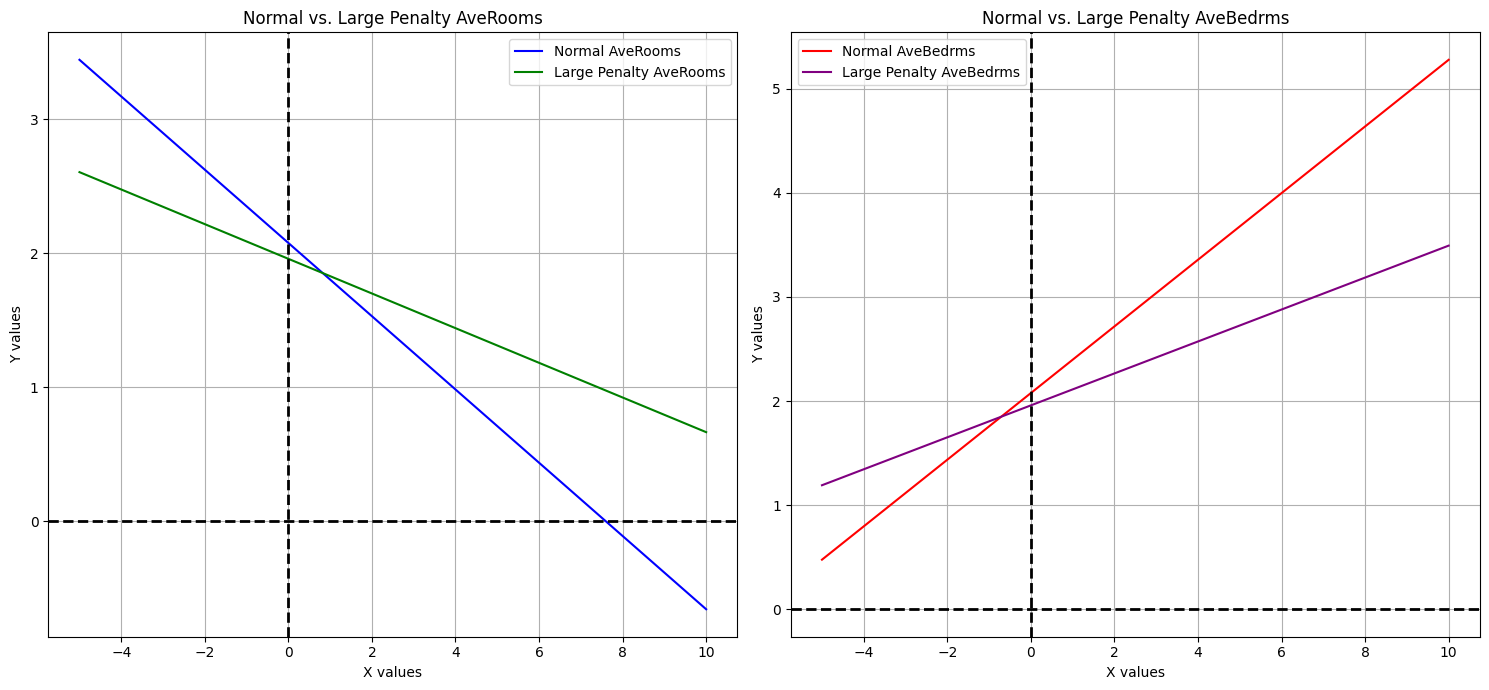

In [292]:
import matplotlib.pyplot as plt
#  X values
x = np.linspace(-5, 10, 100)

# Flatten the arrays for element-wise operations
B_coef_flat = B_coef.flatten()
B_test_flat = B_test.flatten()

# Calculate y-values for AveRooms
y_normal_AveRooms = B_coef_flat[3] * x + B_coef_flat[0]
y_large_penalty_AveRooms = B_test_flat[3] * x + B_test_flat[0]

# Calculate y-values for AveBedrms
y_normal_AveBedrms = B_coef_flat[4] * x + B_coef_flat[0]
y_large_penalty_AveBedrms = B_test_flat[4] * x + B_test_flat[0]

# Create the figure
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot for AveRooms
axs[0].plot(x, y_normal_AveRooms, label='Normal AveRooms', color='blue')
axs[0].plot(x, y_large_penalty_AveRooms, label='Large Penalty AveRooms', color='green')

# Bold lines for x=0 and y=0 in AveRooms plot
axs[0].axhline(0, color='black', linewidth=2, linestyle='--')  # y = 0
axs[0].axvline(0, color='black', linewidth=2, linestyle='--')  # x = 0

# Add titles and labels for AveRooms plot
axs[0].set_title('Normal vs. Large Penalty AveRooms')
axs[0].set_xlabel('X values')
axs[0].set_ylabel('Y values')
axs[0].legend()
axs[0].grid(True)

# Plot for AveBedrms
axs[1].plot(x, y_normal_AveBedrms, label='Normal AveBedrms', color='red')
axs[1].plot(x, y_large_penalty_AveBedrms, label='Large Penalty AveBedrms', color='purple')

# Bold lines for x=0 and y=0 in AveBedrms plot
axs[1].axhline(0, color='black', linewidth=2, linestyle='--')  # y = 0
axs[1].axvline(0, color='black', linewidth=2, linestyle='--')  # x = 0

# Add titles and labels for AveBedrms plot
axs[1].set_title('Normal vs. Large Penalty AveBedrms')
axs[1].set_xlabel('X values')
axs[1].set_ylabel('Y values')
axs[1].legend()
axs[1].grid(True)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

In [293]:
#Our metric for accuracy is mean_absolute_error
from sklearn.metrics import mean_absolute_error
errors = []
alphas = [0.01,0.1,1,10,100,1000]
for alpha in alphas:
    B ,xmean,xstd = ridge_fit(train,predictors,target,alpha) 
    predictions = ridge_predict(test,predictors,xmean,xstd,B)
    errors.append(mean_absolute_error(test[target], predictions))
errors


[np.float64(0.5328684540851782),
 np.float64(0.5328679318248835),
 np.float64(0.5328629485487375),
 np.float64(0.5328219231708091),
 np.float64(0.5328172139968633),
 np.float64(0.5477284241245407)]